<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: The node inputs
### Hidden Layer: factors that transform input layers
### Output Layer: preduction
### Neuron: is a mathematical operation
### Weight: is a factor applied to an input and is located in the hidden layers
### Activation Function:is a function that normalizes the input and is within the hidden layers
### Node Map: is a representation of the neural network
### Perceptron: a type of neural network map


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### A number of inputs are selected and they a series of calculations happens in the hidden layer where weigths, bias and the activation function are applied. An output that the output layer can read is produced and a prediction happens.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [46]:
correct_outputs = df.iloc[:,2:].values
correct_outputs

array([[1],
       [1],
       [1],
       [0]])

In [47]:
inputs = df.iloc[:,:3].values
inputs



array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
              
def sigmoid_derivative(x):
    sx=sigmoid(x)
    return sx*(1-sx)

In [49]:
#initialize random weights
import numpy as np
weights = np.random.random((3,1))
weights

array([[0.62239091],
       [0.3427389 ],
       [0.49111851]])

In [76]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10): #the rate here is specific to gradiant descent
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            if delta_w != 0.0:
                err = err + 1
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.40964888]
 [-2.4108013 ]
 [ 7.49021173]]
Output after training
[[0.99944174]
 [0.99382168]
 [0.9938146 ]
 [0.00799907]]


In [77]:
perc = Perceptron(rate=0.1, niter=100)

X = df[['x1', 'x2']].values
y = df['y']

perc.fit(X,y)

In [78]:
from sklearn.metrics import accuracy_score

pred = perc.predict(X)
print(f'Predictions: {pred}')

acs = accuracy_score(pred,y)
print(f'Accuracy Score: {acs}')

Predictions: [1 1 1 0]
Accuracy Score: 1.0


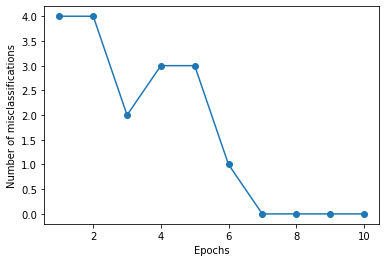

In [79]:
import matplotlib.pyplot as plt
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [63]:
import pandas as pd
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
diabetes.shape

(768, 9)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [65]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [66]:
y = diabetes.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [67]:
scaler = MinMaxScaler()
X= scaler.fit_transform(diabetes[feats])

In [72]:
##### Update this Class #####
import numpy as np

class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10): #the rate here is specific to gradiant descent
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            if delta_w != 0.0:
                err = err + 1
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)

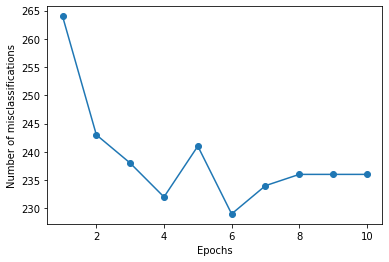

In [73]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [74]:
pn = Perceptron(10000)
pn.fit(X, y)
prediction = pn.predict(X)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y,prediction)

0.7578125

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?